# Začínáme s knihovnou Scikit-learn

Scikit-learn je knihovna s otevřeným zdrojovým kódem určená pro machine learning, která podporuje jak supervised learning, tak unsupervised learning. Poskytuje také různé nástroje pro přizpůsobení modelu, předzpracování dat, výběr a vyhodnocení modelu a mnoho dalších nástrojů.

## Fitting a predikce

Scikit-learn poskytuje desítky vestavěných algoritmů a modelů pro machine learning, které se nazývají estimátory. Pro většinu typů datasetů existuje vhodný estimátor.

Níže se můžeme podívat na velmi jednoduchý příklad, v němž využijeme RandomForestClassifier estimátor.

In [1]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[ 1,  2,  3],  # 2 vzorky, 3 vlastnosti
     [11, 12, 13]]
y = [0, 1]
clf.fit(X, y)

RandomForestClassifier(random_state=0)

Metoda fit obecně přijímá 2 vstupy:
* Matice vzorků  `X`. Velikost `X` je obvykle (n_vzorků, n_vlastností), což znamená, že vzorky jsou reprezentovány jako řádky a vlastnosti jsou reprezentovány jako sloupce.
* Cílové hodnoty `y`, což jsou reálná čísla pro regresní úlohy, nebo celá čísla pro klasifikaci (nebo jakákoli jiná samostatná sada hodnot). Pro unsupervised machine learning není nutné `y` zadávat. Cílové hodnoty y jsou obvykle jednorozměrná pole, kde i-tý záznam odpovídá cíli i-tého vzorku (řádku) `X`.

Očekává se, že `X` i `y` budou numpy pole nebo ekvivalentní datové typy podobné matici, ačkoli některé predikce fungují s jinými formáty, jako jsou nekompletní matice.

Jakmile je model připraven, lze jej použít k předpovědi cílových hodnot pro nová data.

In [2]:
clf.predict(X) # Stará data

array([0, 1])

In [3]:
clf.predict([[4, 5, 6], [14, 15, 16]]) # Nová data

array([0, 1])

## Transformátory

Machine learningový model se často skládá z různých částí. Typicky se skládá z kroku předzpracování, který transformuje data, a konečného prediktoru, který předpovídá cílové hodnoty.

V knihovně scikit-learn transformátory sledují stejné API jako objekty odhadu (ve skutečnosti všechny dědí ze stejné třídy BaseEstimator). Objekty transformátoru nemají metodu predikce, ale spíše metodu transformace, která vydává nově transformovanou matici vzorku X.

In [4]:
from sklearn.preprocessing import StandardScaler

X = [[0, 15],
    [1, -10]]

StandardScaler().fit(X).transform(X)

array([[-1.,  1.],
       [ 1., -1.]])

## Pipeline – Kombinování transformátorů a estimátorů

Transformátory a estimátory (prediktory) lze kombinovat do jednoho sjednocujícího objektu: pipeline. Pipeline využívá stejných metod jako estimátor fit a predict. 

V následujícím příkladu načteme datovou sadu Iris, rozdělíme ji na tréninkové a testovací sady a spočítáme přesnost pipeline na testovacích datech:

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression()
        )

# Načteme náš dataset a rozdělíme ho na tréninkovou a testovací sadu

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [6]:
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

## Hodnocení modelů

Vytvoření modelu pomocí datasetu neznamená, že bude dobře předvídat neznámá data. Je třeba ohodnotit, s jakou přesností bude model taková data předvídat. Metoda train_test_split, jež rozděluje datovou sadu na tréninkové a testovací sady a mnoho dalších nástrojů, které nám poskytuje scikit-learn, nám pomáhají tyto modely ohodnotit. Zejména pokud se jedná o hodnocení křížové.

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()

result = cross_validate(lr, X, y)
result['test_score']

array([1., 1., 1., 1., 1.])

Vychází nám velmi vysoký koeficient determinace, protože máme jen základní dataset.

# Lineární modely

Následuje sada metod určených pro regresi, u kterých se očekává, že cílová hodnota bude lineární kombinací prvků. V matematickém zápisu platí, že pokud $ \hat{y} $ je následně predikovaná hodnota

$ \hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p $

pak budeme určovat vektor $ w = (w_1,..., w_p) $ jako `koeficient` a $ w_0 $ jako `průsečík`.

## Obyčejné nejmenší čtverce

Lineární regrese odpovídá lineárnímu modelu s koeficienty $ w = (w_1,..., w_p) $, který se snaží minimalizovat zbytkový součet čtverců mezi pozorovanými cíli v datové sadě a cíli předpovězenými lineární aproximací. Matematicky řeší problém formy:

$ \min_{w} || X w - y||_2^2 $

Následující příklad využívá pouze první vlastnosti v datové sadě pro diabetes, aby ilustroval datové body v dvourozměrném grafu. Přímku lze vidět na grafu, což ukazuje, jak se lineární regrese pokouší nakreslit přímku, která nejlépe minimalizuje zbytkový součet čtverců mezi pozorovanými odpověďmi v datovém souboru a odpověďmi předpovězenými lineární aproximací.

Rovněž se vypočítají koeficienty, zbytkový součet čtverců a koeficient determinace.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


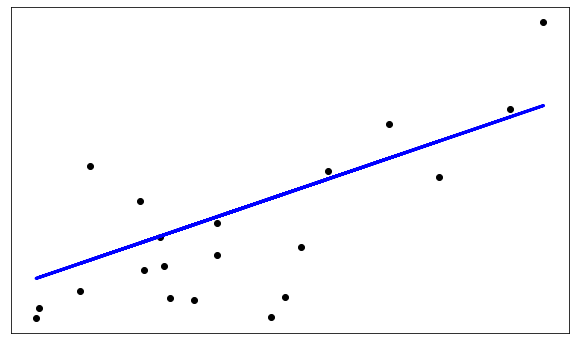

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.figure(figsize=(10,6))
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Ridge regrese

Ridge regrese řeší některé problémy obyčejných nejmenších čtverců omezením velikosti koeficientů. Ridge koeficienty minimalizují penalizovaný zbytkový součet čtverců:

$ \min_{w} || X w - y||_2^2 + \alpha ||w||_2^2 $

Parametr složitosti $ \alpha \geq 0 $ řídí míru smrštění: čím větší je hodnota $ \alpha $, tím větší je velikost smrštění a koeficienty se stávají robustnějšími pro kolinearitu.

V tomto příkladu je použita Ridge Regrese. Každá barva představuje jinou vlastnost vektoru koeficientu, která se zobrazuje jako funkce parametru regularizace.

Tento příklad také ukazuje užitečnost použití Ridge regrese na špatně podmíněné matice. U takových matic může mírná změna v cílové proměnné způsobit velké odchylky ve vypočítaných vahách. V takových případech je užitečné nastavit určitou regularizaci (alfa) ke snížení této variace.

Když je alfa velké, regulační efekt dominuje funkci druhé mocniny ztráty a koeficienty mají tendenci se přibližovat k nule. Na konci grafu, protože alfa se blíží nule a řešení se čím dál více podobá obyčejným nejmenším čtvercům, vykazují koeficienty velké oscilace. V praxi je nutné alfa vyladit tak, aby byla udržována rovnováha mezi oběma.

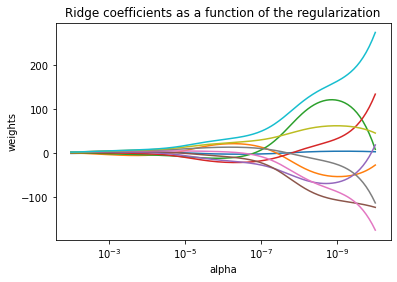

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X je 10x10 Hilbertova matice
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Decision tree modely

Decision tree (DT, rozhodovací strom) je neparametrická metoda supervised machine learning používaná pro klasifikaci a regresi. Cílem je vytvořit model, který předpovídá hodnotu cílové proměnné pomocí jednoduchých rozhodovacích pravidel odvozených z datových funkcí. Na DT lze pohlížet jako na konstantní aproximaci po částech.

V následujícím příkladu se podíváme na DT, který se bude snažit opsat sinusoidu. Výchozí data obsahují několik bodů, které vybočují z této křivky za účelem zmatení modelu. Výsledek se snaží aproximovat lineární regresi sinusoidy.

Můžeme si všimnout, že pokud je maximální hloubka stromu (řízená parametrem max_depth) nastavena příliš vysoko, rozhodovací stromy se naučí příliš jemné podrobnosti tréninkových dat a snaží se přizpůsobit i bodům, které z křivky vybočují, tj. Overfit.

<Figure size 432x288 with 0 Axes>

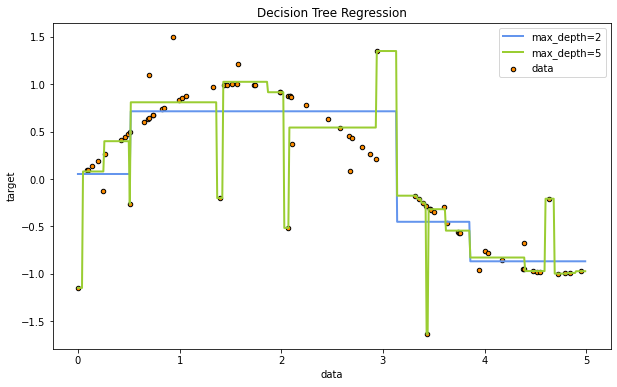

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Mezi **výhody** rozhodovacích stromů patří:
* Jsou snadno pochopitelné a interpretovatelné. Rozhodovací stromy lze vizualizovat.
* Vyžadují pouze malou přípravu dat. Jiné techniky často vyžadují normalizaci dat, je třeba vytvořit fiktivní proměnné a odstranit prázdné hodnoty. Tento modul však nepodporuje chybějící hodnoty.
* Jsou schopny zpracovávat číselné i kategorické údaje. Implementace scikit-learn však zatím nepodporuje kategorické proměnné. Jiné techniky se obvykle specializují na analýzu datových sad, které mají pouze jeden typ proměnných.
* Kvalitu modelu je možné ověřit pomocí statistických testů. To umožňuje zohlednit spolehlivost modelu.

Mezi **nevýhody** rozhodovacích stromů patří:
* Jsou velmi náchylné k tzv. overfitting. Aby se tomuto problému zabránilo, je třeba implementovat mechanismy, jako je nastavení minimálního počtu vzorků požadovaných v uzlu listu nebo nastavení maximální hloubky stromu.
* Mohou být nestabilní, protože malé odchylky v datech mohou mít za následek generování zcela jiného stromu. Tento problém zmírníme použitím rozhodovacích stromů v souboru.
* Jejich předpovědi nejsou plynulé, ani spojité, ale částečně konstantní aproximací, jak je vidět na výše uvedeném obrázku.

## Klasifikace pomocí Decision tree modelů

DecisionTreeClassifier je třída schopná provádět vícenásobnou klasifikaci na datové sadě.

Stejně jako u jiných klasifikátorů, DecisionTreeClassifier má jako vstup dvě pole: pole X, tvaru (n_samples, n_features) obsahující tréninkové vzorky a pole Y celočíselných hodnot, tvaru (n_samples,).

In [11]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [12]:
clf.predict([[2., 2.]])

array([1])

V případě, že existuje více tříd se stejnou a nejvyšší pravděpodobností, klasifikátor zvolí třídu s nejnižším indexem.

DecisionTreeClassifier je schopen jak binární (kde jsou štítky [-1, 1]) klasifikace, tak i té vícenásobné (kde jsou štítky [0,…, K-1]).

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Jakmile model vytvoříte, můžete strom vykreslit pomocí funkce plot_tree:

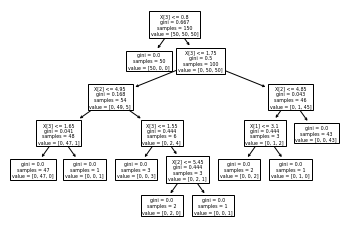

In [14]:
tree.plot_tree(clf);

## Vyneste rozhodovací plochu rozhodovacího stromu na datové sadě iris

U každé dvojice vlastností datasetu iris se rozhodovací strom učí tzv. rozhodovací hranice vytvořené z kombinací jednoduchých pravidel odvozených z tréninkových vzorků.

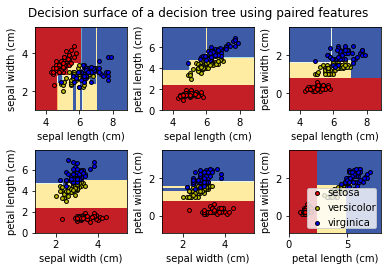

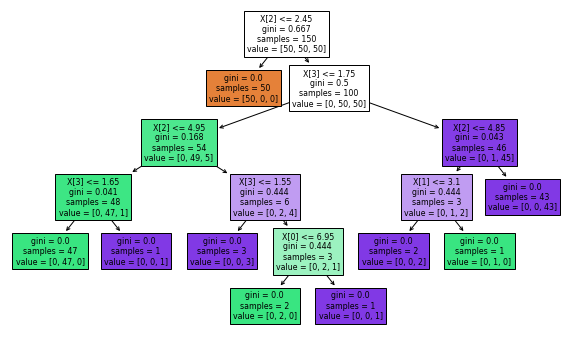

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(10,6))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

# Souborové metody

Cílem souborových metod je kombinovat předpovědi několika základních estimatorů vytvořených s daným algoritmem učení.

Obvykle se rozlišují dva typy souborových metod:
* **Průměrovací metody** jsou principem řízení pro sestavení několika odhadů nezávisle na sobě a následné průměrování jejich predikce. V průměru je kombinovaný odhad obvykle lepší než kterýkoli z odhadů jedné báze, protože jeho variance je snížena.
* Naproti tomu v **posilovacích metodách** se základní odhady vytvářejí postupně a pokouší se snížit zkreslení kombinovaného estimátoru. Motivací je spojit několik slabých modelů a vytvořit silný celek.

## Soubory náhodných rozhodovacích stromů

Modul sklearn.ensemble obsahuje dva průměrující algoritmy založené na náhodných rozhodovacích stromech: algoritmus RandomForest a metoda Extra-Trees. Predikce souboru je uvedena jako průměrná predikce jednotlivých klasifikátorů.

Stejně jako ostatní klasifikátory musí být klasifikátory souborů vytvořený pomocí dvou polí: pole X tvaru (n_samples, n_features) obsahující tréninkové vzorky a pole Y tvaru (n_samples,) obsahující cílové hodnoty.

In [16]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [17]:
clf.predict([[2., 2.]])

array([1])